In [1]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%pylab inline

Populating the interactive namespace from numpy and matplotlib


График плотности случайного вектора $\xi \sim \mathscr{N} \left( \begin{pmatrix} 0 \\ 0 \end{pmatrix},  \begin{pmatrix} 10 & 8 \\ 8 & 10 \end{pmatrix} \right)$:

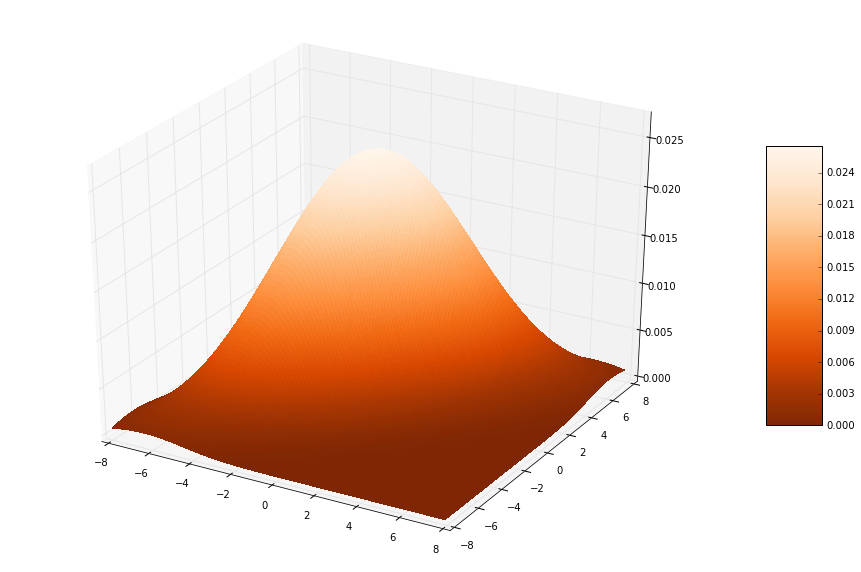

In [8]:
x, y = np.mgrid[-8:8:0.1, -8:8:0.1]
#pos = np.dstack((x, y))
density = sps.multivariate_normal.pdf(np.dstack((x, y)), mean=[0, 0], cov=[[10, 8], [8, 10]])
#   
#

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(grid[0], grid[1], density, rstride=1, cstride=1, cmap='Oranges_r', linewidth=0, antialiased=False)
ax.set_zlim(0, 0.027)
fig.colorbar(surf, shrink=0.5, aspect=5)

Плотность условного распределения $f_{\xi \mid \eta}(x \mid y) = \frac{f_{(\xi, \eta})(x,y)}{f_{\eta}(y)}$.

In [3]:
def f_cond_dens(y, grid):
    density_12 = np.array([sps.multivariate_normal.pdf((grid[i], y),
                                             mean=[0,0], 
                                             cov=[[10, 8], [8, 10]]) for i in range(grid.size)])
                        
    density_2 = sps.norm.pdf(np.zeros(grid.size) + y, scale=sqrt(10))
    return (density_12/density_2)
    

Построим графики условной плотности для $y \in \{-3, 0, 1, 5\}$.

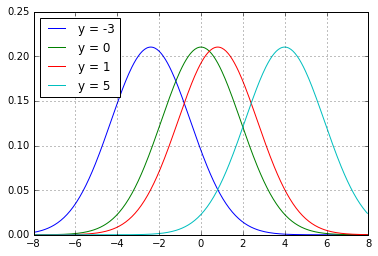

In [4]:
grid = np.mgrid[-8:8:0.05]
plot(grid, f_cond_dens(-3, grid), label='y = -3')
plot(grid, f_cond_dens(0, grid), label='y = 0')
plot(grid, f_cond_dens(1, grid), label='y = 1')
plot(grid, f_cond_dens(5, grid), label='y = 5')
plt.legend(loc=2)
plt.grid()
plt.show()

Заметим, что $cov(10\xi_1-8\xi_2, \xi_2) = 10cov(\xi_1, \xi_2) - 8cov(\xi_2, \xi_2) = 0$. Тогда по свойствам условного мат. ожидания имеем:

$\mathbb{E}(10\xi_1-8\xi_2|\xi_2)=E(10\xi_1-8\xi_2) = 0$. 

С другой стороны,  $\mathbb{E}(10\xi_1 - 8\xi_2\mid\xi_2) = 10\mathbb{E}(\xi_1\mid|\xi_2)-8\xi_2$. Таким образом, $\mathbb{E}(\xi_1|\xi_2) = \frac{4}{5}\xi_2 \sim \mathcal{N}(0, \frac{32}{5})$.

Тогда, сравним  $\mathbb{E}(\xi_1\mid\xi_2 = y)$ и $\mathbb{E}\xi_1$:

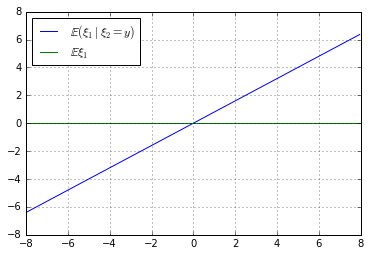

In [5]:
grid = np.arange(-8, 8, 0.05)
plot(grid, 0.8*grid, label=r'$\mathbb{E}(\xi_1\mid\xi_2 = y)$')
plot(grid, 0*grid, label=r'$\mathbb{E}\xi_1$')
plt.legend(loc=2)
plt.grid()
plt.show()